# Problem 1: Softmax regression with backpropagation

### Task 1.1: Backpropagation


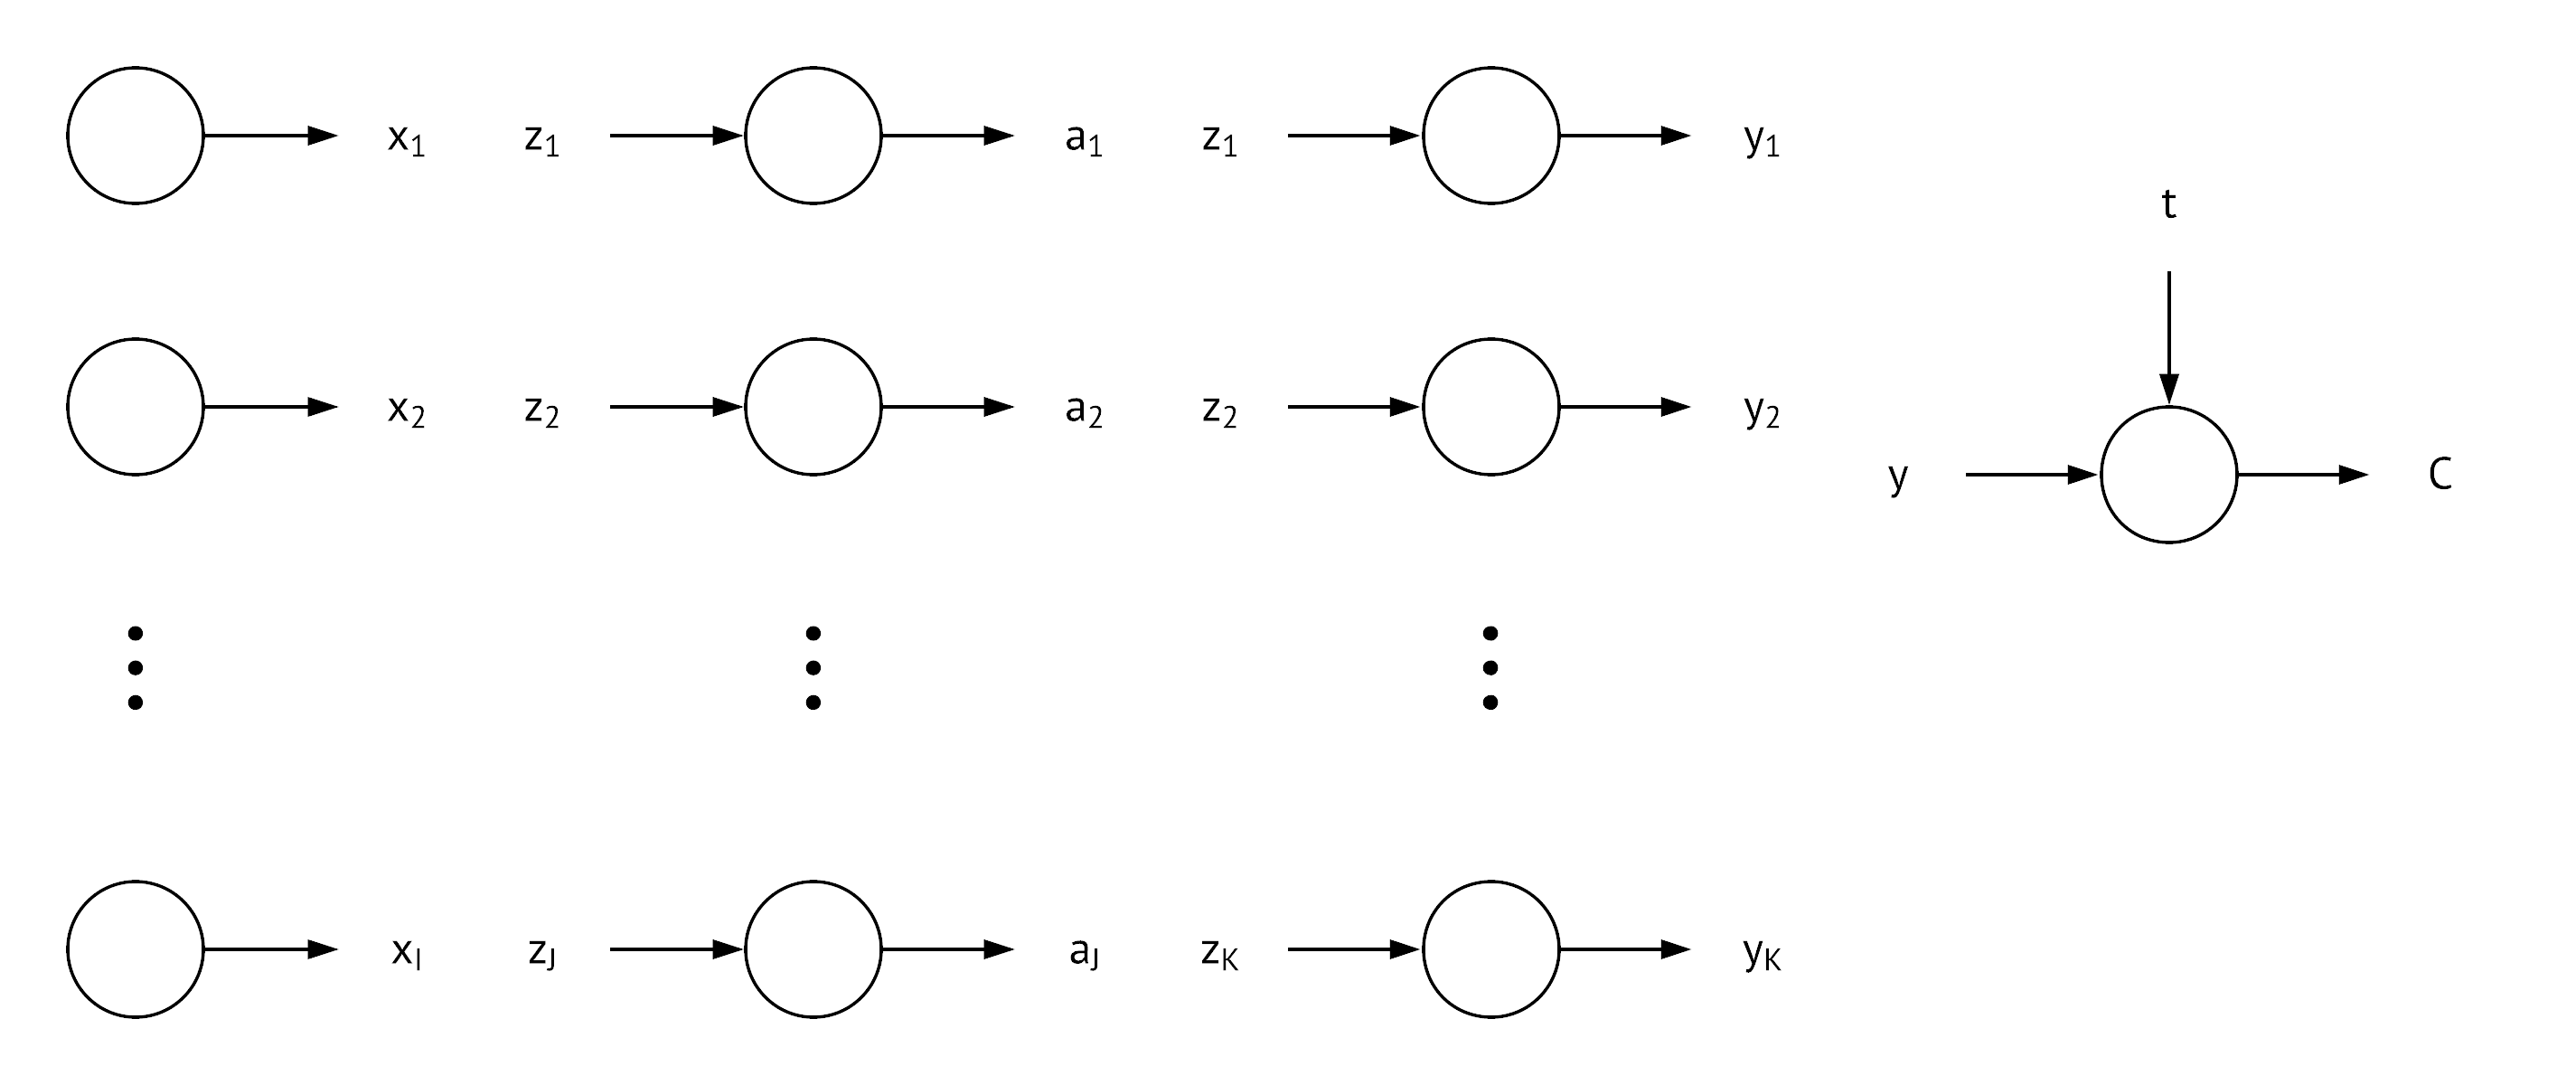

\begin{equation*}
    w_{ji} := w_{ji} - \alpha \frac{\partial C}{\partial w_{ji}}
\end{equation*}

To get a better overview of the different dependencies, the different inputs and outputs are written as functions:

\begin{align*}
    C &= \sum_{k=1}^{K} C(y_{k}, t_{k}) \\
    y_k &= \sigma^2(z_k) \\
    z_k &= \sum_{j=1}^{J} (w_{kj}, a_j) \\
    a_j &= \sigma^1(z_j) \\
    z_j &= \sum_{i=1}^{I} (w_{ji}, x_i) \\
\end{align*}

The loss gradient with respect to the weights in the first layer is then:

\begin{align*}
    \frac{\partial C}{\partial w_{ji}} 
    &= 
    \sum_{k=1}^{K} \bigg( 
            \frac{\partial C}{\partial y_k} 
            \frac{\partial y_k}{\partial z_k} 
            \frac{\partial z_k}{\partial a_j} 
            \frac{\partial a_j}{\partial z_j} 
            \frac{\partial z_j}{\partial w_{ji}} 
    \bigg)
    =
    \sum_{k=1}^{K} \bigg(
            \delta_k
            \frac{\partial z_k}{\partial a_j} 
            \frac{\partial a_j}{\partial z_j} 
            \frac{\partial z_j}{\partial w_{ji}} 
    \bigg)
\end{align*}

The partial derivatives can then be found individually as:

\begin{align*}
    \frac{\partial z_k}{\partial a_j}
    &=
    \frac{\partial}{\partial a_j} \bigg(
            \sum_{m=1}^{J} \bigg( w_{km} a_m \bigg)
    \bigg)
    = w_{kj}
    \\
    \frac{\partial a_j}{\partial z_j}
    &=
    \frac{\partial}{\partial z_j} \bigg(
            \sigma^1(z_j)
    \bigg)
    = \sigma^{1}{'}(z_j)
    \\
    \frac{\partial z_j}{\partial w_{ji}}
    &=
    \frac{\partial}{\partial w_{ji}} \bigg(
            \sum_{n=1}^{I} \bigg( w_{jn} x_n
    \bigg)
    = x_i
\end{align*}

Introducing $\delta_j = \sigma^{1}{'}(z_j) \sum_k \big( w_{kj} \delta_k \big)$ results in the following loss gradient:

\begin{align*}
    \frac{\partial C}{\partial w_{ji}}
    &=
    \sum_k \bigg(
            \delta_k
            \frac{\partial z_k}{\partial a_j} 
            \frac{\partial a_j}{\partial z_j} 
            \frac{\partial z_j}{\partial w_{ji}} 
    \bigg)
    =
    \sum_k \big(
            \delta_k
            w_{kj}
            \sigma^{1}{'}(z_j)
            x_i
    \big)
    =
    x_i \sigma^{1}{'}(z_j) \sum_k \big( w_{kj} \delta_k \big)
    =
    x_i \delta_j
\end{align*}

Thus the weight update rule for the first layer becomes:

\begin{equation*}
    w_{ji} := w_{ji} - \alpha \delta_j x_i
\end{equation*}

### Task 1.2: Vectorize computation

To make the matrix calculus more easy the following notation is used:


- $\mathbf{x}$ - input
- $\mathbf{w}^1$ - weights of the hidden layer
- $\mathbf{z}^1$ - input to the hidden layer
- $\mathbf{\sigma}^1$ - activation function of the hidden layer
- $\mathbf{a}^1$ - activation of the hidden layer
- $\mathbf{z}^2$ - input to the output layer
- $\mathbf{\sigma}^2$ - activation function of the output layer
- $\mathbf{y}$ - activation of the output layer


In order to vectorize the computation the weights are rewritten as matrices and the features as a column vector:

\begin{equation*}
    \mathbf{w}^1
    =
    \begin{bmatrix}
        w_{11}^1 & w_{12}^1 & \cdots & w_{1I}^1 \\
        w_{21}^1 & w_{22}^1 & \cdots & w_{2I}^1 \\
        \vdots & \cdots & \cdots & \vdots \\
        w_{J1}^1 & \cdots & \cdots & w_{JI}^1
    \end{bmatrix}
    \quad
    \mathbf{w}^2
    =
    \begin{bmatrix}
        w_{11}^2 & w_{12}^2 & \cdots & w_{1J}^2 \\
        w_{21}^2 & w_{22}^2 & \cdots & w_{2J}^2 \\
        \vdots & \cdots & \cdots & \vdots \\
        w_{K1}^2 & \cdots & \cdots & w_{KJ}^2
    \end{bmatrix}
    \quad
    \mathbf{x}
    =
    \begin{bmatrix}
        x_1 \\
        x_2 \\
        \vdots \\
        x_i
    \end{bmatrix}
\end{equation*}

The input to and output from the hidden layer can then respectively be written as:

\begin{equation*}
    \mathbf{z}^1
    =
    \begin{bmatrix}
        w_{11}^1x_{1} + w_{12}^1x_{2} + \cdots + w_{1I}^1x_{I} \\
        w_{21}^1x_{1} + w_{22}^1x_{2} + \cdots + w_{2I}^1x_{I} \\
        \vdots \\
        w_{J1}^1x_{1} + w_{J2}^1x_{2} + \cdots + w_{JI}^1x_{I} \\
    \end{bmatrix}
    =
    \mathbf{w}^1 \mathbf{x}
    \quad
    \quad
    \quad
    \mathbf{a}^1
    =
    \begin{bmatrix}
        \sigma^1 (z_1^1) \\
        \sigma^1 (z_2^1) \\
        \vdots \\
        \sigma^1 (z_J^1) \\
    \end{bmatrix}
    =
    \mathbf{\sigma}^1 (\mathbf{z}^1)
    =
    \mathbf{\sigma}^1 (\mathbf{w}^1 \mathbf{x})
\end{equation*}

The input to and output from the output layer can respectively be written as:

\begin{equation*}
   \mathbf{z}^2
   =
   \begin{bmatrix}
       w_{11}^2a_{1}^{1} + w_{12}^2a_{2}^{1} + \cdots + w_{1J}^2a_{J}^{1} \\
       w_{21}^2a_{1}^{1} + w_{22}^2a_{2}^{1} + \cdots + w_{2J}^2a_{J}^{1} \\
       \vdots \\
       w_{K1}^2a_{1}^{1} + w_{K2}^2a_{2}^{1} + \cdots + w_{KJ}^2a_{J}^{1} \\
   \end{bmatrix}
   =
   \mathbf{w}^2 \mathbf{a}^1
   \quad
   \quad
   \quad
   \mathbf{y} 
   =
   \begin{bmatrix}
       \mathbf{\sigma}^2(z_1^2) \\
       \mathbf{\sigma}^2(z_2^2) \\
       \vdots \\
       \mathbf{\sigma}^2(z_K^2) \\
   \end{bmatrix}
   =
   \mathbf{\sigma}^2 (\mathbf{z}^2)
   =
   \mathbf{\sigma}^2 ((\mathbf{w}^2)^T \mathbf{a}^1)
   =
   \mathbf{\sigma}^2 (\mathbf{w}^2 \mathbf{\sigma}^1 (\mathbf{w}^1 \mathbf{x}))
\end{equation*}

The error of neuron k in layer 2 is defined as:

\begin{equation*}
    \delta_k^2 \equiv \frac{\partial C}{\partial z_k^2} = \frac{\partial C}{\partial y_k} \frac{\partial y_k}{z_k^2}
\end{equation*}

Writing the error from layer two on vector form we get:

\begin{equation*}
    \mathbf{\delta}^2
    =
    \begin{bmatrix}
        \frac{\partial C}{\partial z_1^2} \\
        \frac{\partial C}{\partial z_2^2} \\
        \vdots \\
        \frac{\partial C}{\partial z_K^2}
    \end{bmatrix}
    =
    \begin{bmatrix}
        \frac{\partial C}{\partial y_1} \frac{\partial y_1}{\partial z_1^2} \\
        \frac{\partial C}{\partial y_2} \frac{\partial y_2}{\partial z_2^2} \\
        \vdots \\
        \frac{\partial C}{\partial y_K} \frac{\partial y_K}{\partial z_K^2} \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        \frac{\partial C}{\partial y_1} \\
        \frac{\partial C}{\partial y_2} \\
        \vdots \\
        \frac{\partial C}{\partial y_K} \\
    \end{bmatrix}
    \odot
    \begin{bmatrix}
        \frac{\partial y_1}{\partial z_1^2} \\
        \frac{\partial y_2}{\partial z_2^2} \\
        \vdots \\
        \frac{\partial y_K}{\partial z_K^2} \\
    \end{bmatrix}
    =
    \nabla_{\mathbf{y}} C \odot \mathbf{\sigma}^{2}{'}(\mathbf{z}^2)
\end{equation*}

The weight update rule for the individual weights in the second layer is:

\begin{equation*}
    w_{kj}^2 := w_{kj}^2 - \alpha \frac{\partial C}{\partial w_{kj}^2} = w_{kj}^2 - \alpha \delta_k^2 a_j^1
\end{equation*}

Written in matrix form this becomes:

\begin{equation*}
    \mathbf{w}^2
    =
    \begin{bmatrix}
        w_{11}^2 & w_{12}^2 & \cdots & w_{1J}^{2} \\
        w_{21}^2 & w_{22}^2 & \cdots & w_{2J}^{2} \\
        \vdots & \cdots & \cdots & \vdots \\
        w_{K1}^2 & w_{K2}^2 & \cdots & w_{KJ}^{2} \\
    \end{bmatrix}
    := 
    \begin{bmatrix}
        w_{11}^2 & w_{12}^2 & \cdots & w_{1J}^{2} \\
        w_{21}^2 & w_{22}^2 & \cdots & w_{2J}^{2} \\
        \vdots & \cdots & \cdots & \vdots \\
        w_{K1}^2 & w_{K2}^2 & \cdots & w_{KJ}^{2} \\
    \end{bmatrix}
    -
    \alpha
    \begin{bmatrix}
        \delta_1^2 a_1^2 & \delta_1^2 a_2^2 & \cdots & \delta_1^2 a_J^2 \\
        \delta_2^2 a_1^2 & \delta_2^2 a_2^2 & \cdots & \delta_2^2 a_J^2 \\
        \vdots & \cdots & \cdots & \vdots \\
        \delta_K^2 a_1^2 & \delta_K^2 a_2^2 & \cdots & \delta_K^2 a_J^2 \\
    \end{bmatrix}
    :=
    \mathbf{w}^2 - \alpha \mathbf{\delta}^2 (\mathbf{a}^1)^T
\end{equation*}

The error of neuron j in layer 1 is defined as:

\begin{equation*}
    \delta_j^1 
    \equiv \frac{\partial C}{\partial z_j^1} 
    = \sum_{k=1}^{K} \big( \frac{\partial C}{\partial y_k} \frac{\partial y_k}{z_k^2} 
    \frac{\partial z_k^2}{\partial a_j^1} \big) \frac{\partial a_j ^1}{z_j^1}
    = \sum_{k=1}^{K} \big( w_{kj}^2 \delta_k^2 \big) \sigma^{1}{'}(z_j^1) 
\end{equation*}

Writing the error from the hidden layer on vector form we get:

\begin{equation*}
    \mathbf{\delta}^1
    =
    \begin{bmatrix}
        \delta_1^1 \\
        \delta_2^1 \\
        \vdots \\
        \delta_J^1 \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        \sum_{k=1}^{K} \big( w_{k1}^2 \delta_k^2 \big) \sigma^{1}{'}(z_1^1) \\
        \sum_{k=1}^{K} \big( w_{k2}^2 \delta_k^2 \big) \sigma^{1}{'}(z_2^1) \\
        \vdots \\
        \sum_{k=1}^{K} \big( w_{kJ}^2 \delta_k^2 \big) \sigma^{1}{'}(z_J^1)
    \end{bmatrix}
    =
    \begin{bmatrix}
        w_{11}^2 \delta_1^2 + \cdots + w_{K1}^2 \delta_K^2 \\
        w_{12}^2 \delta_1^2 + \cdots + w_{K2}^2 \delta_K^2 \\
        \vdots \\
        w_{1J}^2 \delta_1^2 + \cdots + w_{KJ}^2 \delta_K^2
    \end{bmatrix}
    \odot
    \begin{bmatrix}
        \sigma^{1}{'}(z_1^1) \\
        \sigma^{1}{'}(z_2^1) \\
        \vdots \\
        \sigma^{1}{'}(z_J^1)
    \end{bmatrix}
    =
    (\mathbf{w}^2)^T \mathbf{\delta}^2 \odot \mathbf{\sigma}^{1}{'}(\mathbf{z}^1)
\end{equation*}


The weight update rule for the first layer is:

\begin{equation*}
    w_{ji}^1 := w_{ji}^1 - \alpha \delta_j^1 x_i
\end{equation*}

Written in matrix form this becomes:

\begin{equation*}
    \mathbf{w}^1
    =
    \begin{bmatrix}
        w_{11}^{1} & w_{12}^{1} & \cdots & w_{1I}^{1} \\
        w_{21}^{1} & w_{22}^{1} & \cdots & w_{2I}^{1} \\
        \vdots & \cdots & \cdots & \vdots \\
        w_{J1}^{1} & w_{J2}^{1} & \cdots & w_{JI}^{1} \\
    \end{bmatrix}
    := 
    \begin{bmatrix}
        w_{11}^{1} & w_{12}^{1} & \cdots & w_{1I}^{1} \\
        w_{21}^{1} & w_{22}^{1} & \cdots & w_{2I}^{1} \\
        \vdots & \cdots & \cdots & \vdots \\
        w_{J1}^{1} & w_{J2}^{1} & \cdots & w_{JI}^{1} \\
    \end{bmatrix}
    -
    \alpha
    \begin{bmatrix}
        \delta_1^1 x_1 & \delta_1^1 x_2 & \cdots & \delta_1^1 x_I \\
        \delta_2^1 x_1 & \delta_2^1 x_2 & \cdots & \delta_2^1 x_I \\
        \vdots & \cdots & \cdots & \vdots \\
        \delta_J^1 x_1 & \delta_J^1 x_2 & \cdots & \delta_J^1 x_I \\
    \end{bmatrix}
    :=
    \mathbf{w}^1 - \alpha \mathbf{\delta}^1 (\mathbf{x})^T
\end{equation*}

# Problem 2: MNIST Classification

### Task a: Describing the training procedure

The training procedure of the neural network was done by splitting the dataset into a training set of 60 000 samples and a test set of 10 000 samples. The training set was the split into a smaller training set of 54 000 samples and a validation set of 6 000 samples. The labels of the training, validation and test set was one hot encoded and then normalized using the following formula:

\begin{equation*}
    x := \frac{x - \mu}{\sigma}
\end{equation*}

where $\mu$ is the mean and $\sigma$ is the standard deviation of the dataset. The network was then trained using mini-batch gradient descent and early stopping with a stopping criterion of 3 consecutive validation loss increases. The early stopping criterion was just triggered in the 21st training epoch.

With the following hyperparameters a test accuracy of 90.4 % and a test cross-entropy loss of 0.035 was achieved:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: sigmoid
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0

### Task b: Numerical approximation of the loss gradient

The maximum absolute differences between the calculated and numerically approximated loss gradient was found to be:
- Layer 1: 1.06 $\cdot$ 10$^{-6}$
- Layer 2: 1.44 $\cdot$ 10$^{-6}$

### Task c: Plotting loss and accuracy for training, validation and test set

The development of the accuracies and losses for the training, validation and test set are shown below:

A | B
- | - 
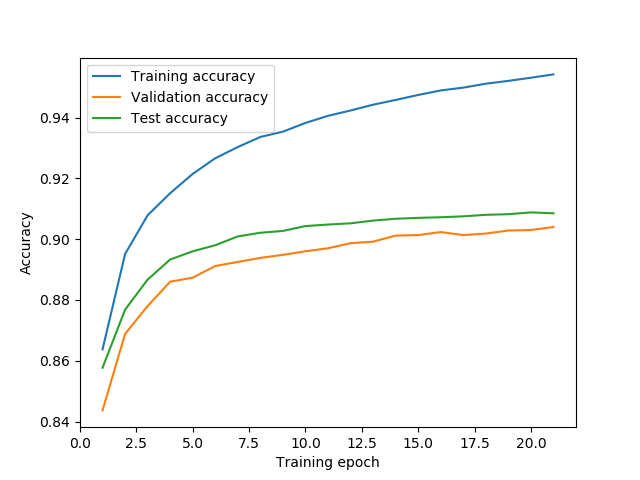 | 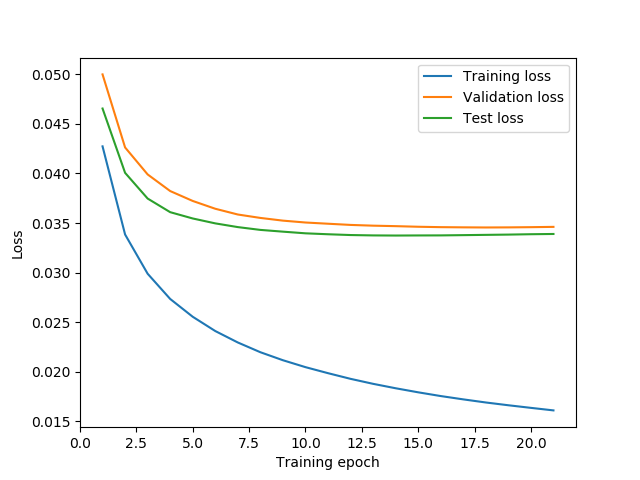


# Problem 3: Adding "tricks of the trade"

### Task a: Shuffling the training data

Data shuffling was added to the training procedure. 

The following hyperparameters were used:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: sigmoid
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0

The training data was shuffled at the beginning of each training epoch and results are shown below:

A | B
- | - 
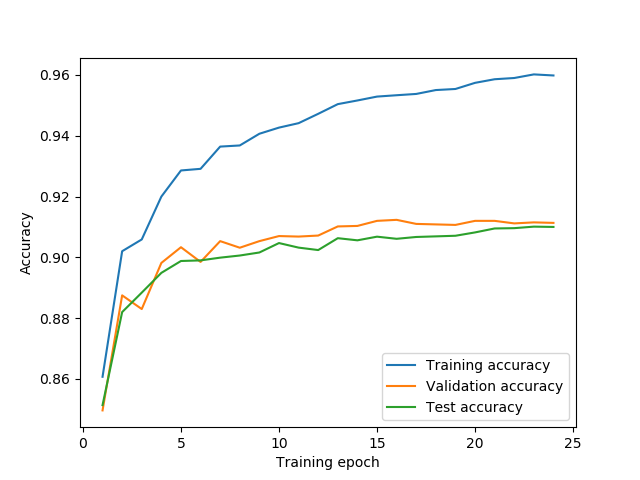 | 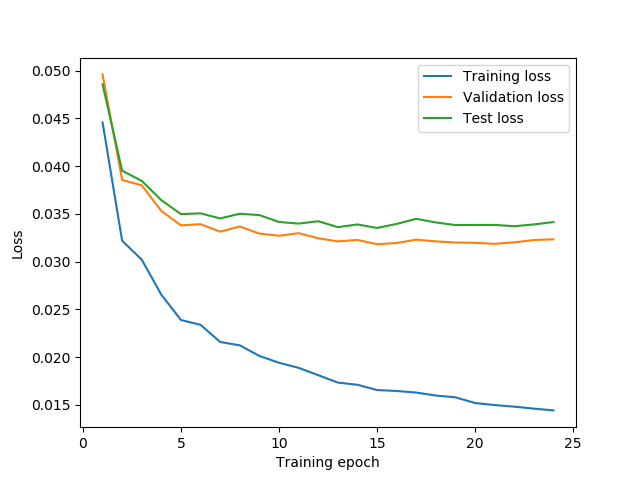

From the plots one can see that the accuracy and loss are more fluctuating with shuffling of the training data than without. This makes sense since the network is fed the samples in a random order, and thus the network does not descent the loss gradient in the same way each training epoch. However the final result of a test accuracy of 91 % and a test cross-entropy loss of 0.034 indicates that the network generalizes slightly better with training data shuffling than without.

### Task b: Using the improved sigmoid, i.e. the tanh-function

The improved sigmoid function, also known as the hyperbolic tangent function is defined as:

\begin{equation*}
    tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\end{equation*}

Its derivative is:

\begin{equation*}
    \frac{\partial}{\partial x} \bigg( tanh(x) \bigg) 
    = \frac{\partial}{\partial x} \bigg( \frac{sinh(x)}{cosh(x)} \bigg) 
    = \frac{sinh'(x)cosh(x) - sinh(x)cosh'(x)}{cosh(x)^2}
    \\
    = \frac{cosh(x)^2 - sinh(x)^2}{cosh(x)^2}
    = 1 - \frac{sinh(x)^2}{cosh(x)^2}
    = 1 - tanh(x)^2
\end{equation*}

The tanh activation function was added to the hidden layer.

The following hyperparameters were used:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

The results from using the improved sigmoid function are shown below:

A | B
- | - 
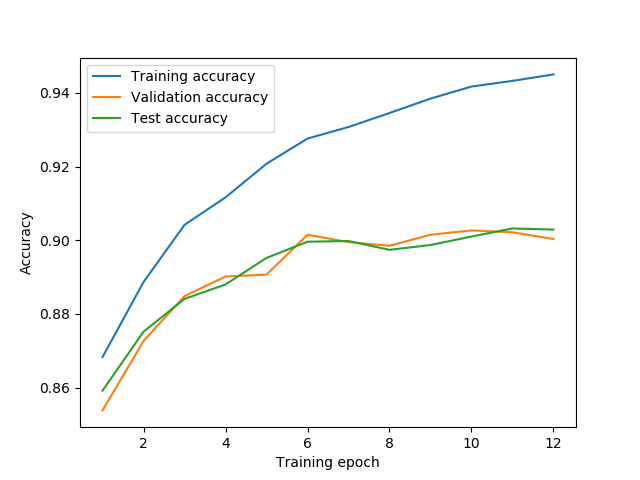 | 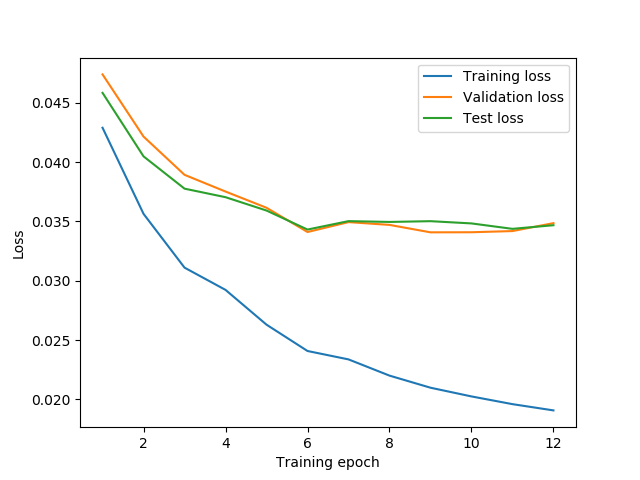

When the early stopping criterion was met the test accuracy was 90.3 % and the test cross-entropy loss was 0.0347. This was not an significant improvement over the network with the sigmoid activation in the hidden layer, in terms of accuracy and loss. However the network was able to get to these results within 12 training epochs, almost half the amount that the network with the sigmoid function used. This could indicate that the tanh function is better than the sigmoid function in terms of learning, which might be due to the fact that it is symmetric about the origin. This makes its average output closer to 0 than the average output of the sigmoid function.

### Task c: Weight initialization using Xavier initialization

The weights of the neural network are initialized using Xavier initialization when the mean of the weights is 0 and the standard deviation of the weights is calculated using the following formula:

\begin{equation*}
    \sigma = \frac{1}{\sqrt{fan_{in}}}
\end{equation*}

where $fan_{in}$ is the number of inputs into the layer.

The following hyperparameters were used:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

The results of using Xavier initialization are shown below:

A | B
- | - 
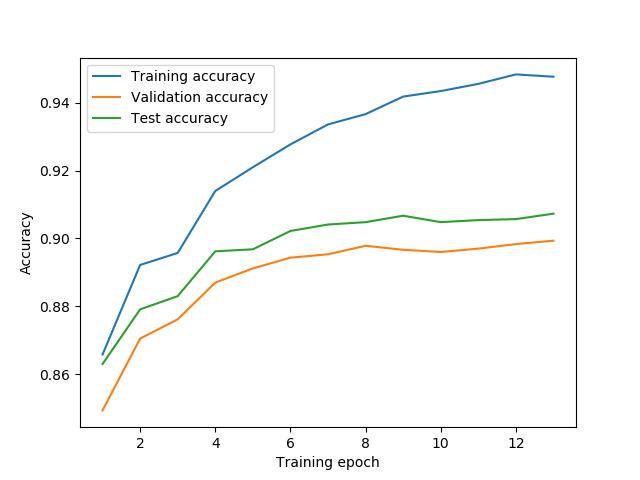 | 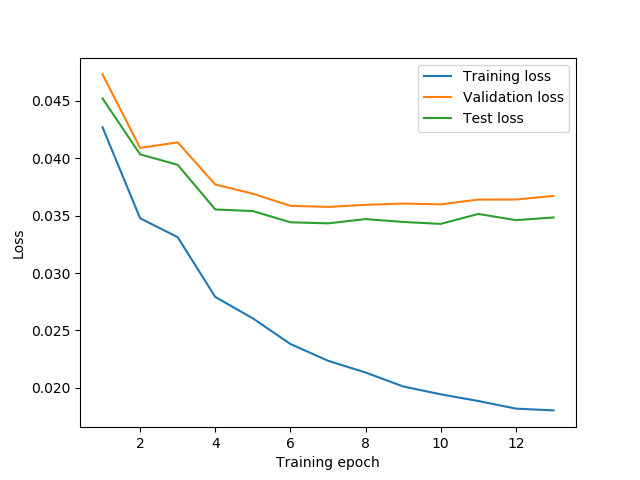

The plots does not shown any significant change in performance from using Xavier weight initialization. The final results were a test accuracy of 90.7 % and a test cross-entropy loss of 0.0348, which is a bit better than without Xavier initialization. It might also be that the plots do not capture the initial effects that the different weight initialization might cause.

### Task d: Using momentum during gradient descent

Having implemented momentum in the gradient descent
accuracy: 91.16 %
loss: 0.0367

The following hyperparameters were used:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.9
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

A | B
- | - 
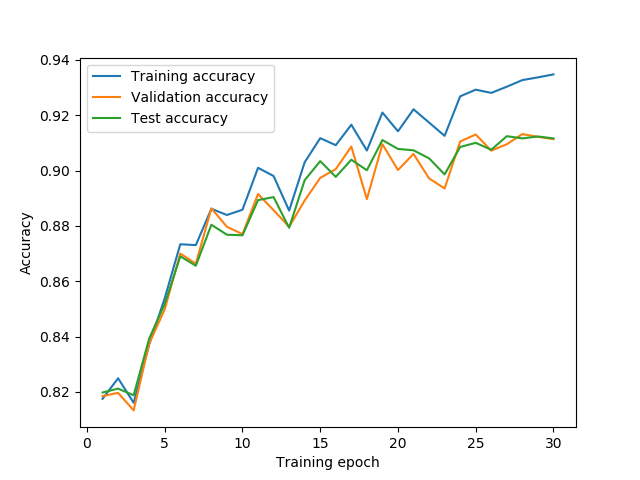 | 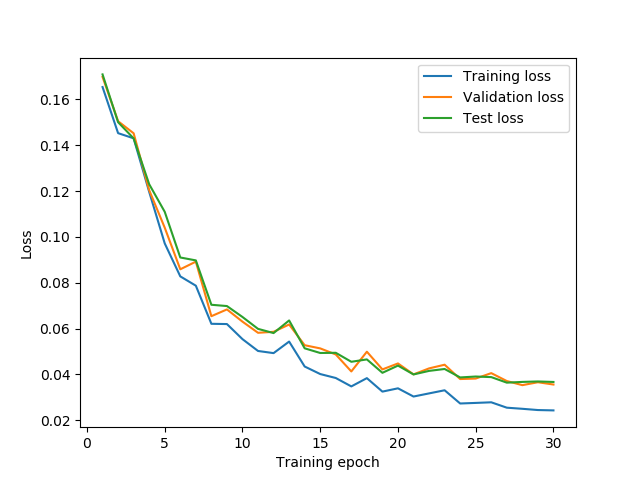

From the plots one can see that the weight change momentum is too high, causing the test accuracy and the test loss to fluctuate. Although the network converges to a test accuracy of 91.16 % and a test cross-entropy loss of 0.0367, the rate of the learning is slowed downed compared to the previous network without momentum. In order to look for the positive effects of adding momentum, it was reduced to 0.4.

The following hyperparameters were used:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

A | B
- | - 
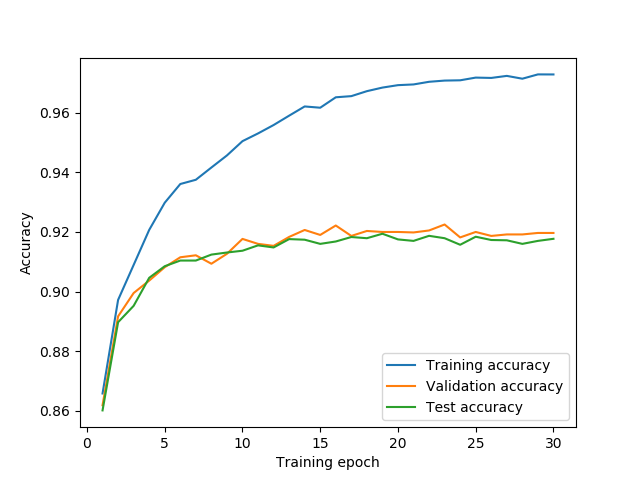 | 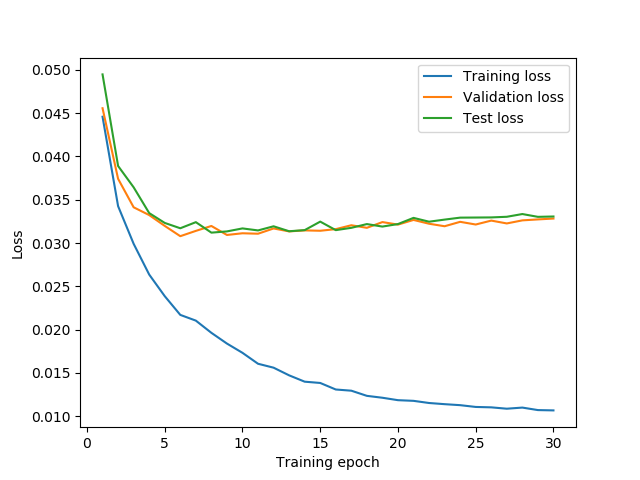

From the accuracy and loss plot one can see that the network learns as fast with a momentum of 0.4 compared to without momentum and reaches an even higher test accuracy and lower test loss, 91.8 % and 0.0332 respectively. The test accuracy and test loss starts to stagnate around training epoch 7 or 8, but it seems that the momentum helps the network make small incremental changes that increases the test accuracy.

# Problem 4: Experiment with network topology

The networks in task 4a, 4b and 4c are based on the following set of hyperparameters:
- Hidden layer size: L$_1$ = 64
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

### Task a: Halving the number of hidden units

Halving the number of hidden units, the hyperparameters for the network are:
- Hidden layer size: L$_1$ = 32
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

A | B
- | - 
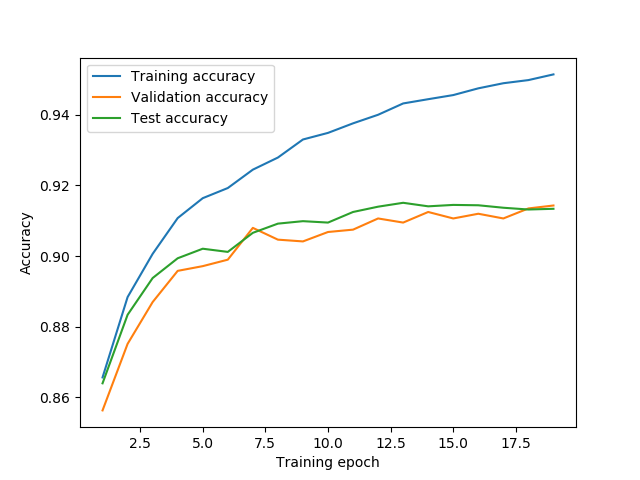 | 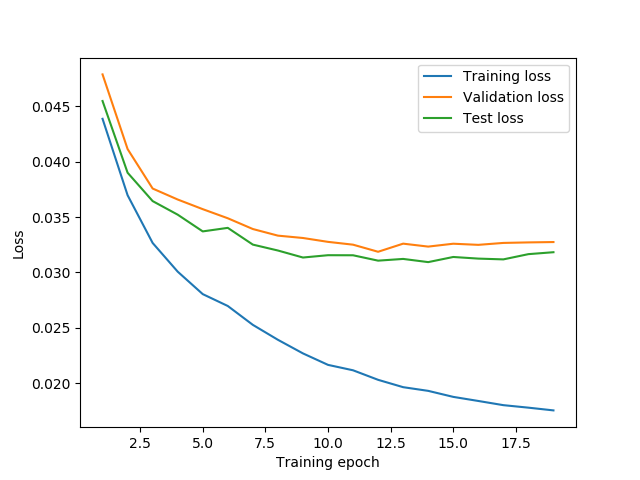

Looking at the plots of the accuracy and loss one can see that they fluctuate a lot less with only 32 hidden units than with 64 hidden units. This might be due to 32 hidden units being sufficient to represent the function that maps the MNIST images to their respective classes, and thus it can learn the mapping with less parameters than the one with 64 hidden layers. This also means that there are less dependencies between parameters, which might be the reason for the learning being less volatile and thus early stopping being triggered earlier. The final test accuracy and test loss of respectively 91.4 % and 0.03183 are however quite similar.

### Task b: Doubling the number of hidden units

Doubling the number of hidden units, the hyperparameters for the network are:
- Hidden layer size: L$_1$ = 128
- Hidden layer activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

A | B
- | - 
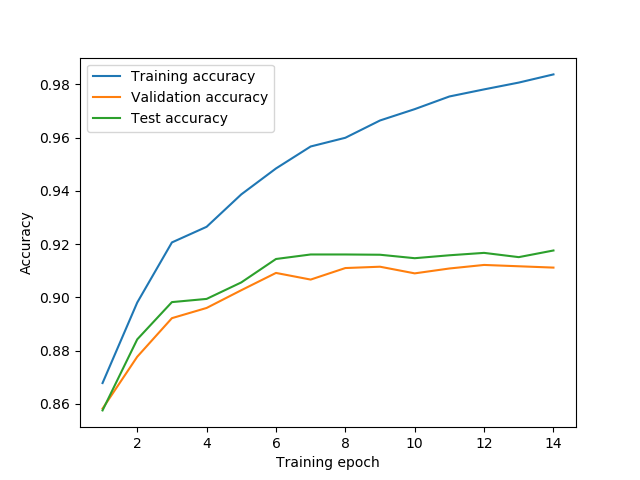 | 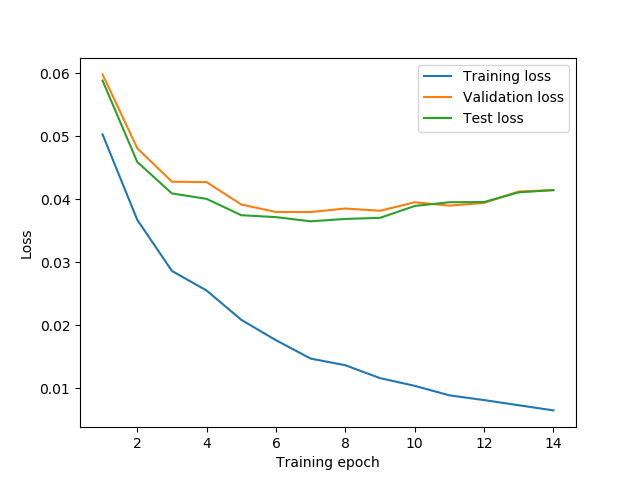

Comparing the plots of the accuracy and loss for the network with double the amount of hidden units with the plots for the network with half the amount of the hidden units one cannot see much difference in the accuracy. The test accuracy was 91.76 %. There is however a significant difference in the test and validation loss. The test loss for the network with double the amount of hidden units was 0.04143, almost 25 % higher than the test loss of the network with half the amount of hidden weights.

### Task c: Two hidden layers, but equal amount of parameters

The layer sizes of the first network were: 784, 64, 10. This yields the follow amount of parameters:

- Layer 1: 784 $\cdot$ 64 weights + 64 biases = 50240
- Layer 2: 64 $\cdot$ 10 weights + 10 biases = 650
- Total: 50250 + 650 = 50900

The layer sizes of the new network would be: 784, x, x, 10. This yields the follow amount of parameters:

- Layer 1: 784 $\cdot$ x weights + x biases = 785 $\cdot$ x
- Layer 2: x $\cdot$ x weights + x biases = x$^2$ + x
- Layer 3: x $\cdot$ 10 weights + 10 biases = 10 $\cdot$ x + 10
- Total: $x^2$ + 796 $\cdot$ x + 10

Setting the two expressions equal yields:

\begin{equation*}
    x^2 + 796x + 10 = 50900 \\
    x^2 + 796x - 50890 = 0 \\
    x = \frac{-796 + \sqrt{796^2 + 4 \cdot 1 \cdot 50890}}{2} \\
    x = 59.48... \approx 59
\end{equation*}

The number of parameters in this network is then:
- Layer 1: 784 $\cdot$ 59 weights + 50 biases = 46315
- Layer 2: 59 $\cdot$ 59 weights + 59 biases = 3540
- Layer 3: 59 $\cdot$ 10 weights + 10 biases = 600
- Total: 46315 + 3540 + 600 = 50455

Increasing the number of hidden layers, the hyperparameters for the network are:
- Hidden layer 1 size: L$_1$ = 59
- Hidden layer 1 activation function: tanh
- Hidden layer 2 size: L$_2$ = 59
- Hidden layer 2 activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 10
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 32
- Training epochs: N = 30
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

A | B
- | - 
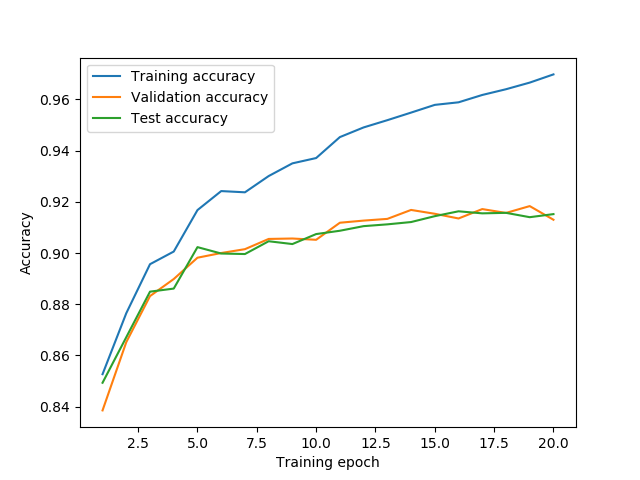 | 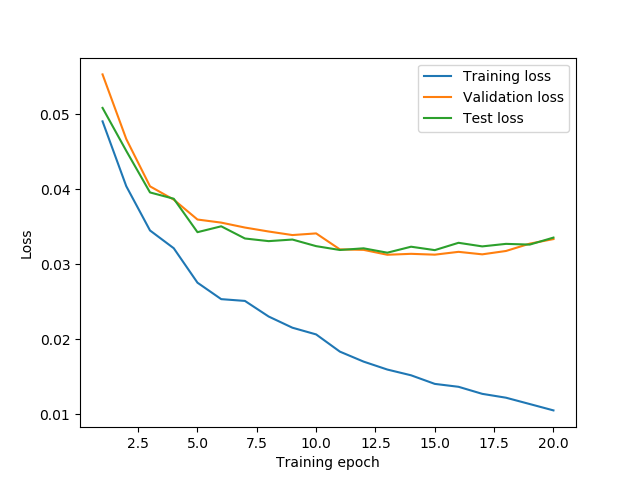

The calculated test accuracy is 91.52 % and the test loss is 0.03355.

# Problem 5: Bonus

### Task a: Implementing dropout

### Task b: Implementing data augmentation

Data augmentation was added by shifting the images in the training set and then training the network both on the augmented and the original training data.

To test training with data augmentation the following hyperparameters were used:
- Hidden layer 1 size: L$_1$ = 32
- Hidden layer 1 activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.1
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 80
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 128
- Training epochs: N = 100
- Early stopping criterion: s = 5
- Dropout probability: p = 0
- Training data shuffling
- Data augmentation, shift = 2

The results of training the network on the original and the augmented training set are shown below:

A | B
- | - 
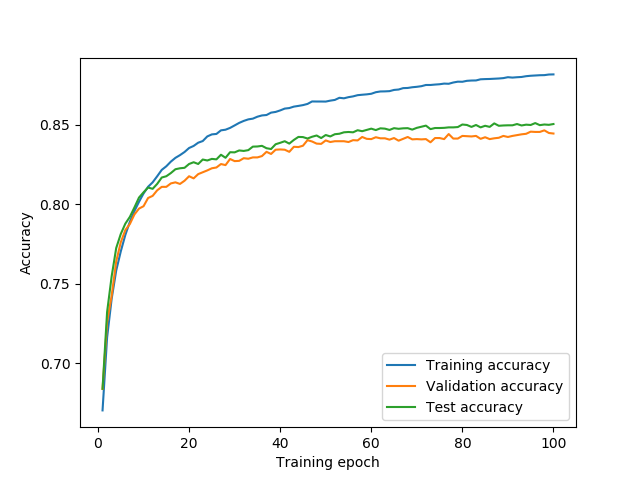 | 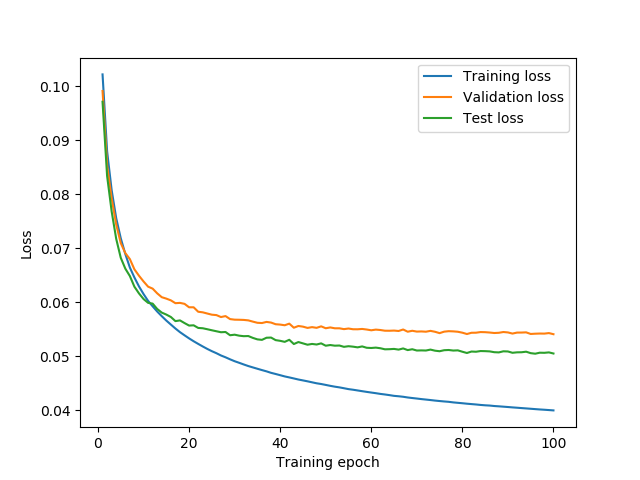


### Task c: Using different activation functions

Due to some numerical instability of the softmax function I was not able to use the ELU or ReLU function in the layer inputing into the softmax layer. Hence, I was only able to test the ELU function in networks with multiple hidden layers. The network was trained on the unaugmented training set.

To test different activation functions the following hyperparameters were used:
- Hidden layer 1 size: L$_1$ = 32
- Hidden layer 1 activation function: ELU
- Hidden layer 2 size: L$_2$ = 32
- Hidden layer 2 activation function: tanh
- Output layer activation function: softmax
- Loss: cross-entropy
- Learning rate: $\alpha$ = 0.5
- Momentum: $\mu$ = 0.4
- Annealing learn rate time constant: T = 80
- L2 regularization weight cost: $\gamma$ = 0
- Batch size: N$_{b}$ = 128
- Training epochs: N = 50
- Early stopping criterion: s = 3
- Dropout probability: p = 0
- Training data shuffling

A | B
- | - 
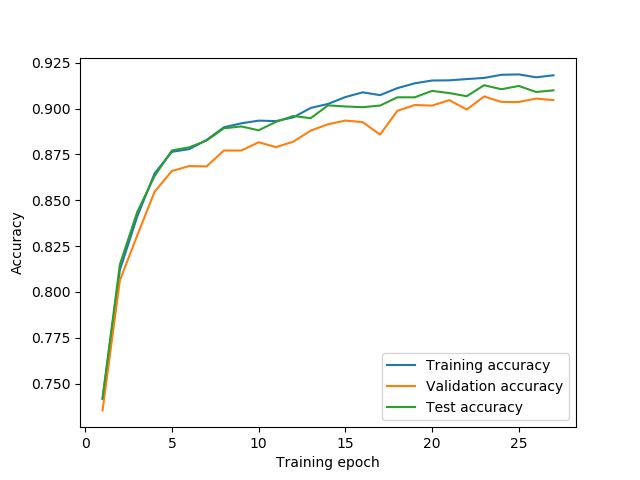 | 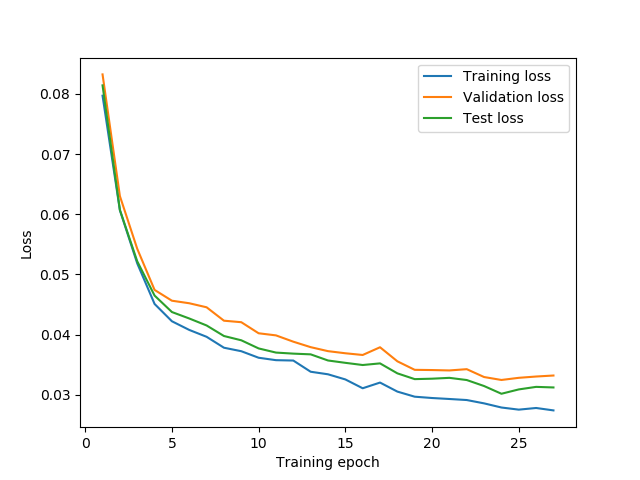